<a href="https://colab.research.google.com/github/LaraMijic/IS-4487/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [2]:
df = pd.read_csv(r'x_superbowl.csv')

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [3]:
df.head()

,Unnamed: 0,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,...,matching_rules,retweeted_status,extended_tweet,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,scopes
0,0,6020fc7e9e1aa8e3e7ad0832,Mon Feb 08 04:29:58 +0000 2021,1.358630e+18,1358634152719839233,@Rebe_Charizard ?????????????????????m(*_ _)m,"[16, 45]","<a href=""http://twitter.com/download/iphone"" r...",False,1.358630e+18,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6020fc7e9e1aa8e3e7ad0833,Mon Feb 08 04:29:55 +0000 2021,1.358630e+18,1358634138639605762,"RT @iiiRatcha: ????????????????????""??????????...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 15:23:25 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6020fc7e9e1aa8e3e7ad0834,Mon Feb 08 04:29:48 +0000 2021,1.358630e+18,1358634110600826880,@kashDAI not you listening to cfm and m&amp;m ...,"[9, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.358630e+18,...,[{'tag': None}],NaN,{'full_text': '@kashDAI not you listening to c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6020fc7e9e1aa8e3e7ad0835,Mon Feb 08 04:29:43 +0000 2021,1.358630e+18,1358634090350583809,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,...,[{'tag': None}],{'created_at': 'Fri Feb 05 08:32:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6020fc7e9e1aa8e3e7ad0836,Mon Feb 08 04:29:42 +0000 2021,1.358630e+18,1358634084537352192,RT @mmschocolate: This year?s #SuperBowlLV com...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Wed Feb 03 15:06:02 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   int64  
 5   text                       9756 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

In [5]:
columns_to_drop = ['Unnamed: 0', '_id', 'id', 'id_str', 'display_text_range', 'truncated','in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'entities', 'matching_rules', 'extended_tweet', 'extended_entities', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'scopes']
df = df.drop(columns_to_drop, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          9756 non-null   object
 1   text                9756 non-null   object
 2   source              9747 non-null   object
 3   quote_count         9756 non-null   int64 
 4   reply_count         9756 non-null   int64 
 5   retweet_count       9756 non-null   int64 
 6   favorite_count      9756 non-null   int64 
 7   favorited           9756 non-null   bool  
 8   retweeted           9756 non-null   bool  
 9   filter_level        9756 non-null   object
 10  lang                9756 non-null   object
 11  retweeted_status    4040 non-null   object
 12  possibly_sensitive  1166 non-null   object
dtypes: bool(2), int64(4), object(7)
memory usage: 857.6+ KB


In [7]:
df.head(15)

,created_at,text,source,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,filter_level,lang,retweeted_status,possibly_sensitive
0,Mon Feb 08 04:29:58 +0000 2021,@Rebe_Charizard ?????????????????????m(*_ _)m,"<a href=""http://twitter.com/download/iphone"" r...",0,1,0,1,False,False,low,ja,NaN,NaN
1,Mon Feb 08 04:29:55 +0000 2021,"RT @iiiRatcha: ????????????????????""??????????...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,False,False,low,th,{'created_at': 'Sun Feb 07 15:23:25 +0000 2021...,NaN
2,Mon Feb 08 04:29:48 +0000 2021,@kashDAI not you listening to cfm and m&amp;m ...,"<a href=""http://twitter.com/download/iphone"" r...",0,1,0,0,False,False,low,en,NaN,NaN
3,Mon Feb 08 04:29:43 +0000 2021,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,0,0,False,False,low,en,{'created_at': 'Fri Feb 05 08:32:11 +0000 2021...,NaN
4,Mon Feb 08 04:29:42 +0000 2021,RT @mmschocolate: This year?s #SuperBowlLV com...,"<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,False,False,low,en,{'created_at': 'Wed Feb 03 15:06:02 +0000 2021...,NaN
5,Mon Feb 08 04:29:40 +0000 2021,RT @Tezhwa: ?????????????????????????????? ???...,"<a href=""http://twitter.com/download/android"" ...",0,0,0,0,False,False,low,th,{'created_at': 'Sun Feb 07 14:46:14 +0000 2021...,NaN
6,Mon Feb 08 04:29:40 +0000 2021,RT @HAIKYUUFESS: *hq contains m/m ushioi // cr...,"<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,False,False,low,en,{'created_at': 'Sun Feb 07 14:50:59 +0000 2021...,False
7,Mon Feb 08 04:29:37 +0000 2021,@iDeepanshu_k @MrPiiyush @s_u_m_m_y_ @akshay_M...,"<a href=""http://twitter.com/download/android"" ...",0,1,0,1,False,False,low,hi,NaN,NaN
8,Mon Feb 08 04:29:36 +0000 2021,"La neta nunca le he entendido al americano, tu...","<a href=""http://twitter.com/download/iphone"" r...",0,1,0,0,False,False,low,es,NaN,NaN
9,Mon Feb 08 04:29:35 +0000 2021,RT @Tezhwa: ?????????????????????????????? ???...,"<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,False,False,low,th,{'created_at': 'Sun Feb 07 14:46:14 +0000 2021...,NaN


Getting rid of the question marks in tweet content

In [8]:
df['text'] = df['text'].str.replace('?', '', regex=True)

In [9]:
df['text']

0                                @Rebe_Charizard m(*_ _)m
1                            RT @iiiRatcha: "   M&amp;M "
2       @kashDAI not you listening to cfm and m&amp;m ...
3       RT @_soniashenoy: M&amp;M says \nSsangyong dea...
4       RT @mmschocolate: This years #SuperBowlLV comm...
                              ...                        
9751    A 5-second ad that felt like a subliminal mess...
9752    RT @anygabrielly: Si quieres yo me quedo pa ot...
9753    I wonder if these Super Bowl messages of unity...
9754    RT @DrunkUncTony: Joe Biden's america #Unity #...
9755    This should be our National Anthem for 2021!\n...
Name: text, Length: 9756, dtype: object

Extract iPhone, andriod, or other from the source column to find device types

In [10]:
def label_device_type(source):
    if pd.notna(source):  # Check if the value is not NaN
        if 'iPhone' in source:
            return 'iPhone'
        elif 'android' in source:
            return 'Android'
    return 'Other'

# Replace NaN values with an empty string before applying the function
df['source'] = df['source'].replace(np.nan, '')
df['device_type'] = df['source'].apply(label_device_type)

In [11]:
df.head()

,created_at,text,source,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,filter_level,lang,retweeted_status,possibly_sensitive,device_type
0,Mon Feb 08 04:29:58 +0000 2021,@Rebe_Charizard m(*_ _)m,"<a href=""http://twitter.com/download/iphone"" r...",0,1,0,1,False,False,low,ja,NaN,NaN,iPhone
1,Mon Feb 08 04:29:55 +0000 2021,"RT @iiiRatcha: "" M&amp;M ""","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,False,False,low,th,{'created_at': 'Sun Feb 07 15:23:25 +0000 2021...,NaN,iPhone
2,Mon Feb 08 04:29:48 +0000 2021,@kashDAI not you listening to cfm and m&amp;m ...,"<a href=""http://twitter.com/download/iphone"" r...",0,1,0,0,False,False,low,en,NaN,NaN,iPhone
3,Mon Feb 08 04:29:43 +0000 2021,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,0,0,False,False,low,en,{'created_at': 'Fri Feb 05 08:32:11 +0000 2021...,NaN,Other
4,Mon Feb 08 04:29:42 +0000 2021,RT @mmschocolate: This years #SuperBowlLV comm...,"<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,False,False,low,en,{'created_at': 'Wed Feb 03 15:06:02 +0000 2021...,NaN,iPhone


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

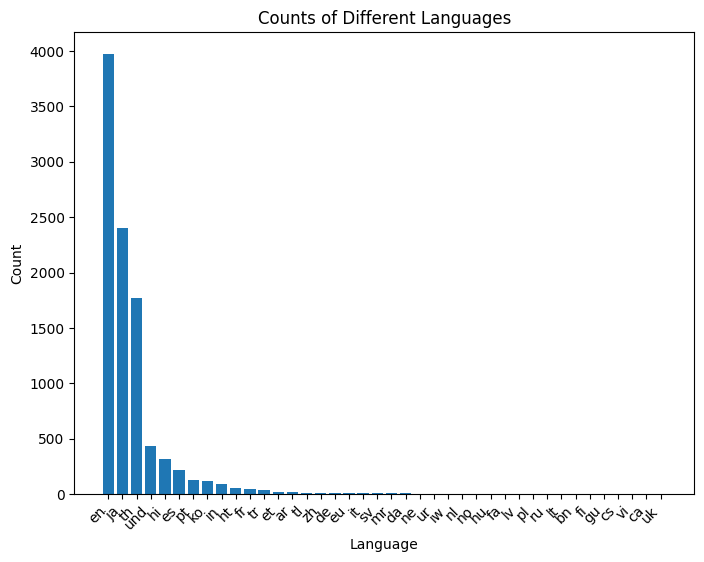

In [12]:
language_counts = df['lang'].value_counts()

plt.figure(figsize=(8, 6))

plt.xticks(rotation=45, ha='right') #rotating labels on x-axis to make more readable

# Plot the bar chart
plt.bar(language_counts.index, language_counts)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Counts of Different Languages')
plt.show()

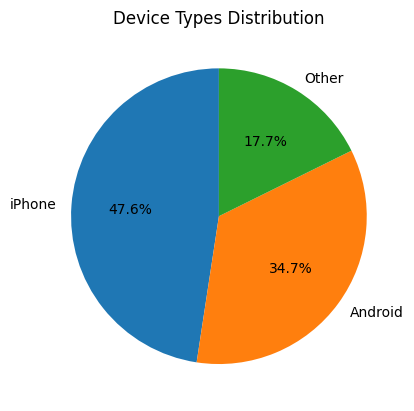

In [13]:
device_counts = df['device_type'].value_counts()
labels = device_counts.index
sizes = device_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Device Types Distribution')
plt.show()